In [1]:
import torch
from torch.utils.data import DataLoader
from image_restoration.dataset import ImageNet2012
from image_restoration.model import RED10
from image_restoration.metrics import psnr
from matplotlib import pyplot as plt
from image_restoration.utils import tensor_to_image, image_to_tensor
from image_restoration.defects import spots, scratches, color
from skimage.metrics import structural_similarity as mssim
from PIL import Image
import os

In [2]:
def plot_comparation(origin, damaged, defect = 'spots'):
    model = RED10()
    plt.figure(figsize=(15, 11))
    plt.subplot(2, 3, 1)
    plt.title('Чистое изображение')
    plt.imshow(tensor_to_image(origin))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, origin)), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(origin), multichannel=True), 2)}')
    plt.subplot(2, 3, 2)
    plt.title('Поврежденное изображение')
    plt.imshow(tensor_to_image(damaged))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, damaged)), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(damaged), multichannel=True), 2)}')
    epochs0 = model.forward(damaged.unsqueeze(0))
    plt.subplot(2, 3, 3)
    plt.title('После 0 эпох обучения')
    plt.imshow(tensor_to_image(epochs0[0]))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, epochs0[0])), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(epochs0[0]), multichannel=True), 2)}')
    model.load_state_dict(torch.load(f'weights{os.sep}de{defect}_red10_4_epochs.pt'))
    epochs4 = model.forward(damaged.unsqueeze(0))
    plt.subplot(2, 3, 4)
    plt.title('После 4 эпох обучения')
    plt.imshow(tensor_to_image(epochs4[0]))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, epochs4[0])), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(epochs4[0]), multichannel=True), 2)}')
    model.load_state_dict(torch.load(f'weights{os.sep}de{defect}_red10_8_epochs.pt'))
    epochs8 = model.forward(damaged.unsqueeze(0))
    plt.subplot(2, 3, 5)
    plt.title('После 8 эпох обучения')
    plt.imshow(tensor_to_image(epochs8[0]))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, epochs8[0])), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(epochs8[0]), multichannel=True), 2)}')
    model.load_state_dict(torch.load(f'weights{os.sep}de{defect}_red10_12_epochs.pt'))
    epochs12 = model.forward(damaged.unsqueeze(0))
    plt.subplot(2, 3, 6)
    plt.title('После 12 эпох обучения')
    plt.imshow(tensor_to_image(epochs12[0]))
    plt.xlabel(f'PSNR: {round(float(psnr(origin, epochs12[0])), 2)} dB; MSSIM: {round(mssim(tensor_to_image(origin), tensor_to_image(epochs12[0]), multichannel=True), 2)}')
    # plt.plot()

In [3]:
clean_img = Image.open(f'test_images{os.sep}clean_example.jpg').resize((256, 256))
clean_tensor = image_to_tensor(clean_img)

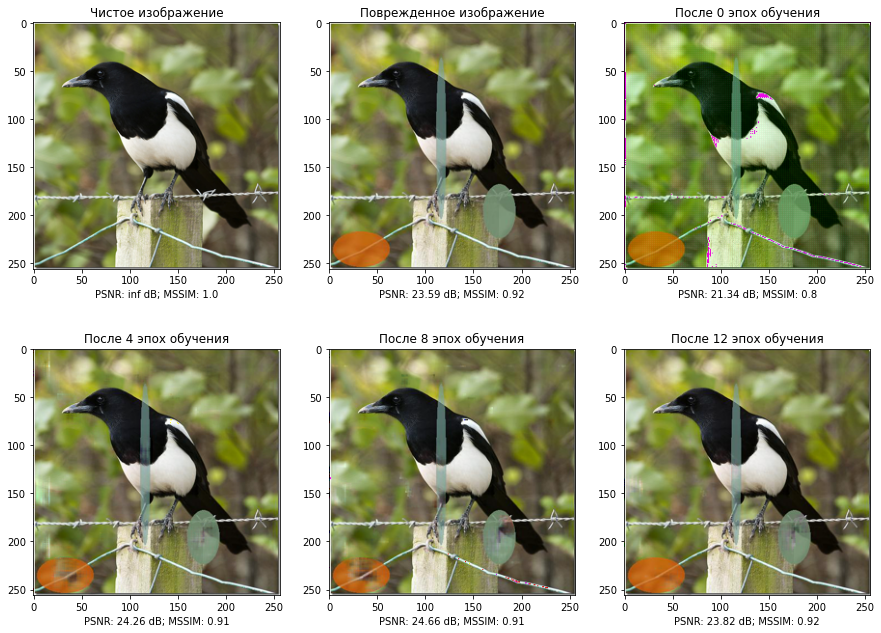

In [4]:
spots_img = Image.open(f'test_images{os.sep}spots_example.jpg').resize((256, 256))
spots_tensor = image_to_tensor(spots_img)
plot_comparation(clean_tensor, spots_tensor, defect='spots')

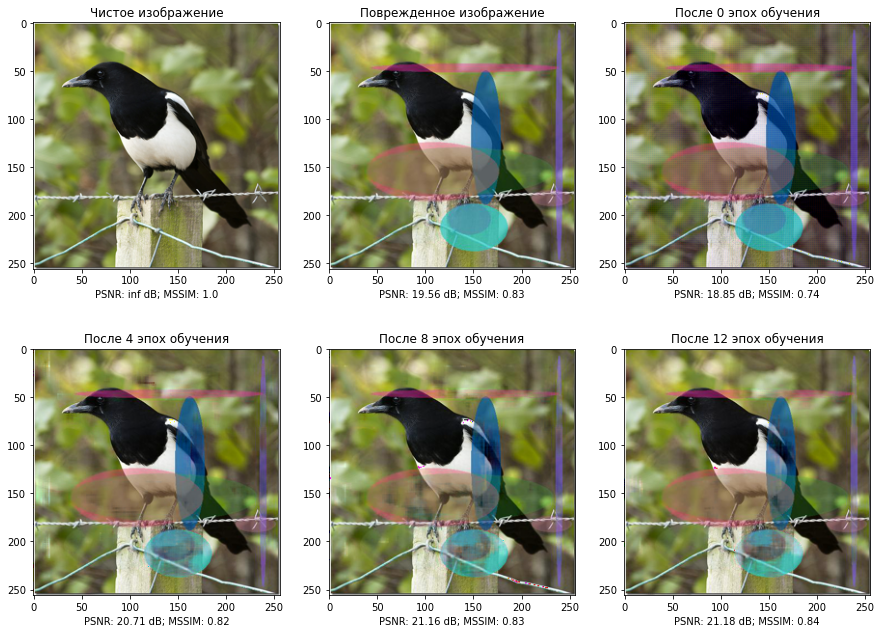

In [5]:
spots1_img = Image.open(f'test_images{os.sep}spots_example1.jpg').resize((256, 256))
spots1_tensor = image_to_tensor(spots1_img)
plot_comparation(clean_tensor, spots1_tensor, defect='spots')

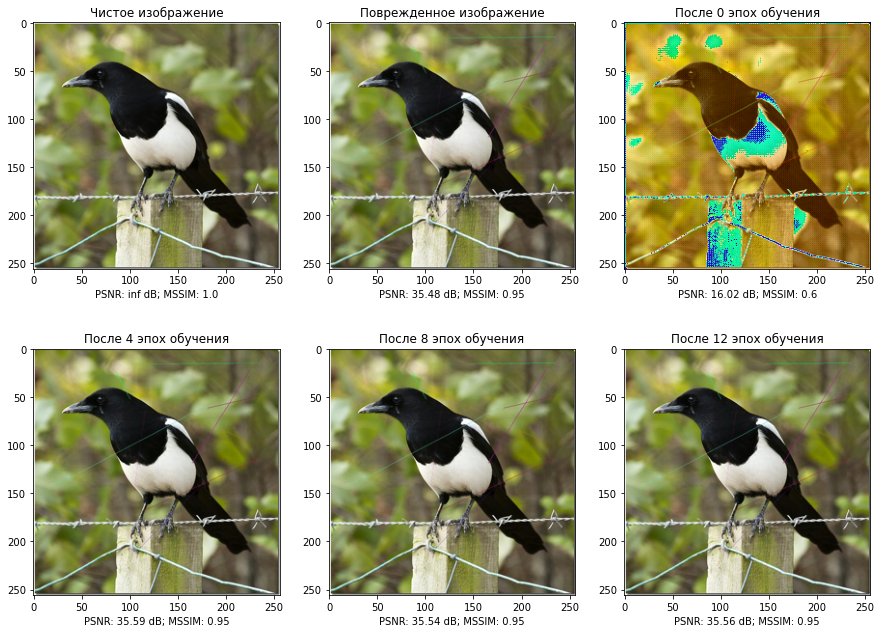

In [6]:
scratches_img = Image.open(f'test_images{os.sep}scratches_example.jpg').resize((256, 256))
scratches_tensor = image_to_tensor(scratches_img)
plot_comparation(clean_tensor, scratches_tensor, defect='scratches')

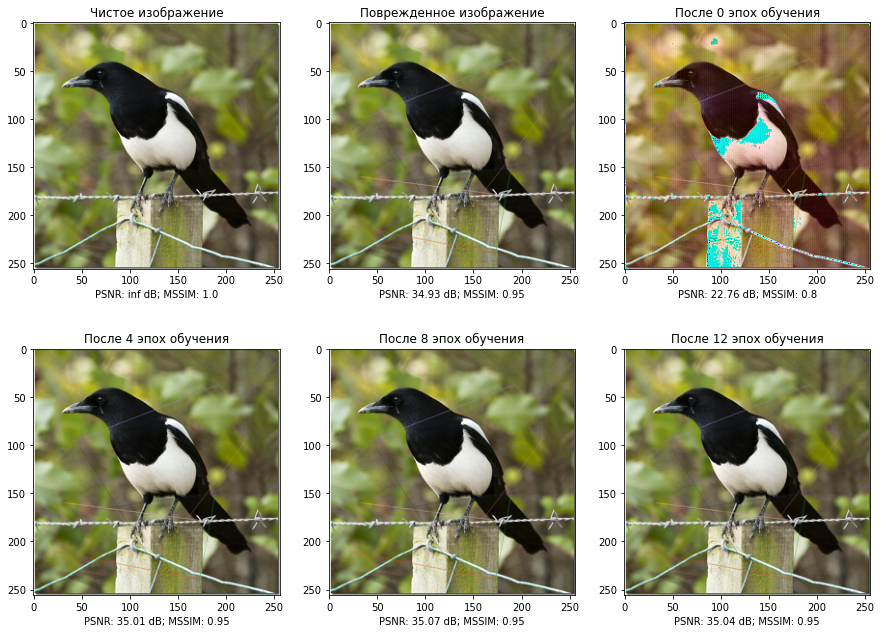

In [7]:
scratches1_img = Image.open(f'test_images{os.sep}scratches_example1.jpg').resize((256, 256))
scratches1_tensor = image_to_tensor(scratches1_img)
plot_comparation(clean_tensor, scratches1_tensor, defect='scratches')

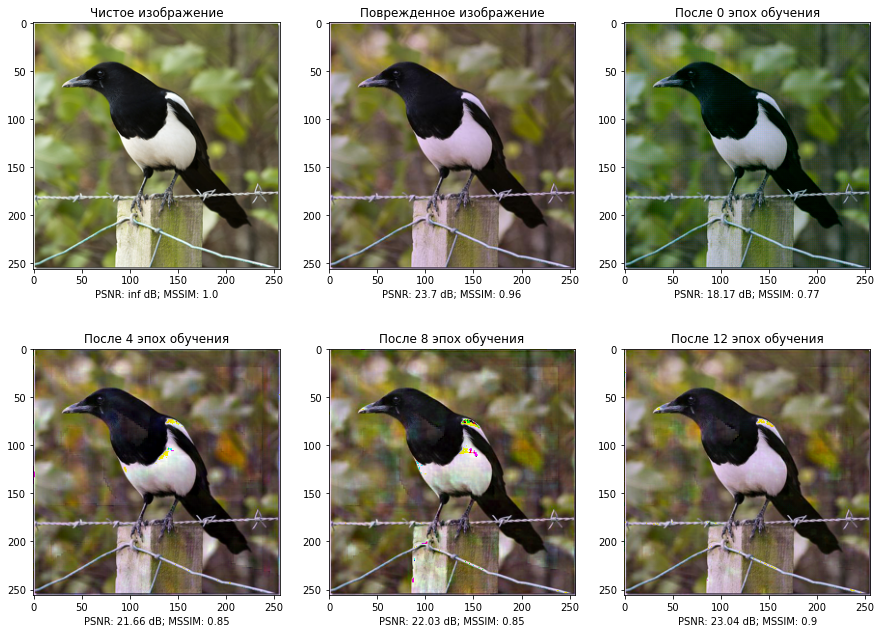

In [8]:
color_img = Image.open(f'test_images{os.sep}color_example.jpg').resize((256, 256))
color_tensor = image_to_tensor(color_img)
plot_comparation(clean_tensor, color_tensor, defect='color')

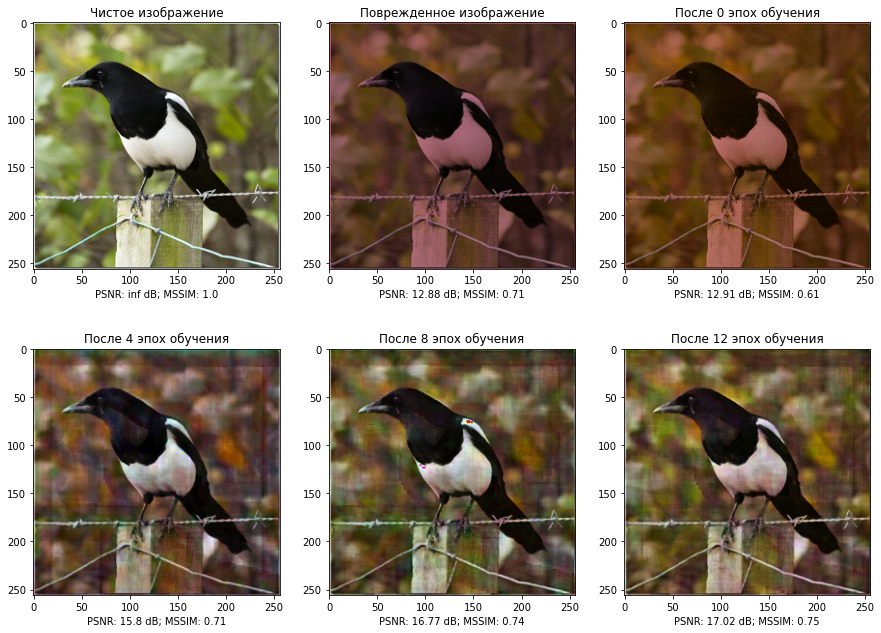

In [9]:
color1_img = Image.open(f'test_images{os.sep}color_example1.jpg').resize((256, 256))
color1_tensor = image_to_tensor(color1_img)
plot_comparation(clean_tensor, color1_tensor, defect='color')

In [10]:
ds_test = ImageNet2012('ImageNet2012\\train', 'train_cls.txt', transform=scratches, size=256, transform_kwargs={'max_count': 10})
model = RED10()

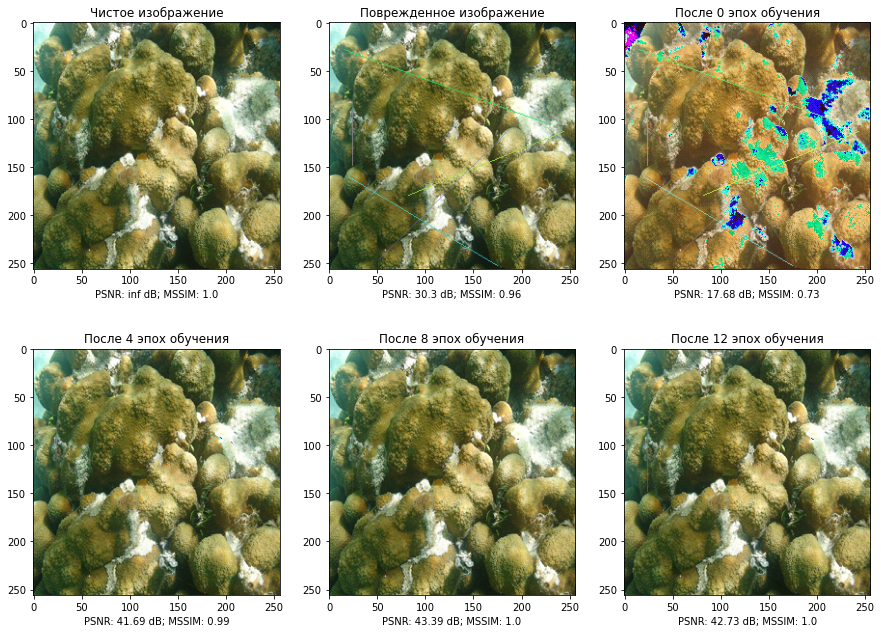

In [13]:
plot_comparation(ds_test[15][1], ds_test[15][0], defect='scratches')